# Úkoly

## SciPy Special

In [1]:
import scipy.special as special
import numpy as np
import matplotlib.pyplot as plt

1. Výpočet Eulerovy konstanty:

- spočtěte Eulerovu konstantu $\gamma$ pomocí funkce `digamma` z modulu `scipy.special`
    - Eulerova konstanta se dá spočítat jako $\gamma = -\psi(1)$, kde $\psi$ je digamma funkce
- porovnejte výsledek s definicí Eulerovy konstanty (pro $n = 100, 1000, ...$) $$\gamma = \lim_{n \to \infty} \left(- \ln(n) + \sum_{k=1}^n \frac{1}{k} \right)$$

In [2]:
-special.digamma(1.0)

np.float64(0.5772156649015329)

In [4]:
n = 1000
-np.log(n)+np.sum(1/np.arange(1,n+1))

np.float64(0.5777155815682082)

2. Vykreslete Beta funci na intervalu $[1, 2]\times[1, 2]$ 

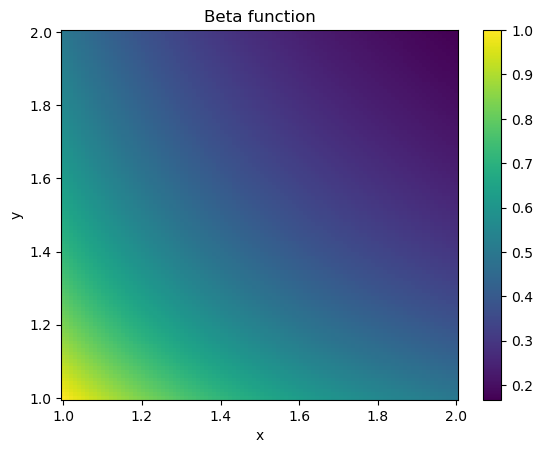

In [5]:
x = np.linspace(1, 2, 100)
y = np.linspace(1, 2, 100)
X, Y = np.meshgrid(x, y)
Z = special.beta(X, Y)

plt.figure()
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.title('Beta function')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## SciPy Sparse

In [7]:
import scipy.sparse as sparse
import scipy.sparse.linalg as sla
import numpy as np
import matplotlib.pyplot as plt

1. Sestavení řídkých matic. Sestavte sparse matici `A` ve formátu CSR. Representující následující matici:
```
[[1 1 0 0]
 [1 3 1 0]
 [0 1 5 1]
 [0 0 1 7]]
 ```
- Použijte sestavení pomocí seznamu indexů a hodnot.


In [8]:
row_idx = np.array([0, 0, 1,1,1,2,2,2,3,3])
col_idx = np.array([0,1,0,1,2,1,2,3,2,3])
data = np.array([1,1,1,3,1,1,5,1,1,7])
A = sparse.csr_matrix((data, (row_idx, col_idx)), shape=(4, 4))
print(A.toarray())

[[1 1 0 0]
 [1 3 1 0]
 [0 1 5 1]
 [0 0 1 7]]


2. Řešení série soustav lineárních rovnic se stejnou maticí `A` a různými pravými stranami `b`:
- sestavte LU faktorizaci matice `A`
- řešte soustavu rovnic pro pravé strany `b1 = [1, 2, 3, 4]` a `b2 = [4, 3, 2, 1]` pomocí spočtené LU faktorizace


In [9]:
lu_decomp = sla.splu(A)
b1 = np.array([1, 2, 3, 4])
b2 = np.array([4, 3, 2, 1])
x1 = lu_decomp.solve(b1)
x2 = lu_decomp.solve(b2)
print(x1)
print(x2)

[0.72131148 0.27868852 0.44262295 0.50819672]
[ 4.7704918  -0.7704918   0.54098361  0.06557377]


/tmp/ipykernel_2310380/623831545.py:1: SparseEfficiencyWarning: splu converted its input to CSC format
  lu_decomp = sla.splu(A)


3. Spektrální rozklad:
- Spočítejte největší vlastní číslo a příslušný vlastní vektor matice A z úlohy 1.

In [11]:
sla.eigsh(A, k=1)

(array([7.45084438]),
 array([[-0.01476242],
        [-0.09523007],
        [-0.40909182],
        [-0.90739032]]))

## SciPy FFTpack

In [12]:
from IPython.display import Audio
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

fs, signal = sp.io.wavfile.read('butterfly_noise.wav')
signal = signal / np.max(np.abs(signal))
Audio(data=signal, rate=fs)

1. Pokuste se odstranit šum z nahrávky pomocí Fourierovy transformace:
- spočtěte Fourierovu transformaci nahrávky (`fft`)
- vykreslete si amplitudové spektrum (`abs` výsledku předchozího bodu) a zhodnoťte hranici mezi šumem a signálem
- odstraňte šum z amplitudového spektra a spočtěte inverzní Fourierovu transformaci (`ifft`)
- přehrajte si reálnou složku výsledku `Audio(data=np.real(filtered_signal), rate=fs)`

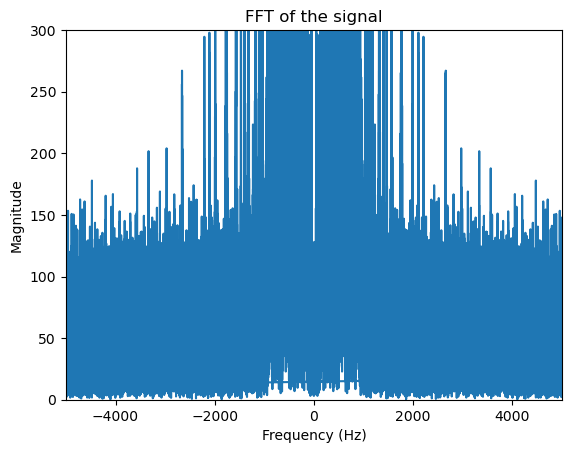

In [17]:
freq_sepctrum = fftpack.fft(signal)
freq = fftpack.fftfreq(len(signal), 1/fs)
plt.figure()
plt.plot(freq, np.abs(freq_sepctrum))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of the signal')
plt.xlim(-5000,5000)
plt.ylim(0,300)
plt.show()

In [ ]:
mask = np.abs(freq_sepctrum) <150
freq_sepctrum[mask] = 0
signal_filtered = np.real(fftpack.ifft(freq_sepctrum))
Audio(data=signal_filtered, rate=fs)

## SciPy Optimize

In [20]:
import scipy.optimize as opt

1. Nalezněte globální maximum funkce $$f(x) = \exp(-x^2) - 1.1 \cdot \exp(-(x-2)^2)$$

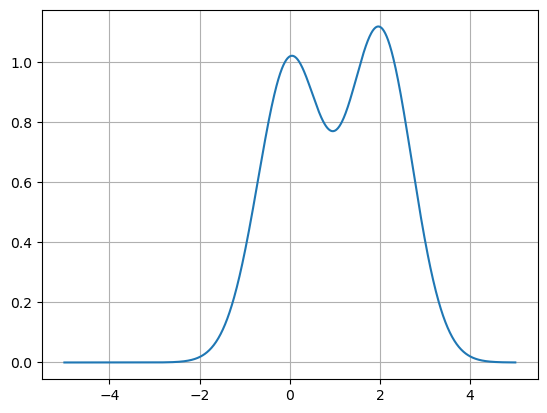

In [21]:
x = np.linspace(-5, 5, 1000)
y = np.exp(-x**2) + 1.1*np.exp(-(x-2)**2)
plt.plot(x, y)
plt.grid()

In [22]:
f = lambda x: -(np.exp(-x**2) + 1.1*np.exp(-(x-2)**2))

res = opt.minimize(fun=f, x0=2)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -1.119704318769675
        x: [ 1.962e+00]
      nit: 1
      jac: [-4.619e-06]
 hess_inv: [[1]]
     nfev: 6
     njev: 3

In [23]:
opt.fminbound(f, -5, 5)

np.float64(1.9619624891202967)

2. Nalezněte všechny kořeny funkce $f(x) = 7.875 \cdot x^5 - 8.75 \cdot x^3 + 1.875 \cdot x$ na intervalu $[-1, 1]$.

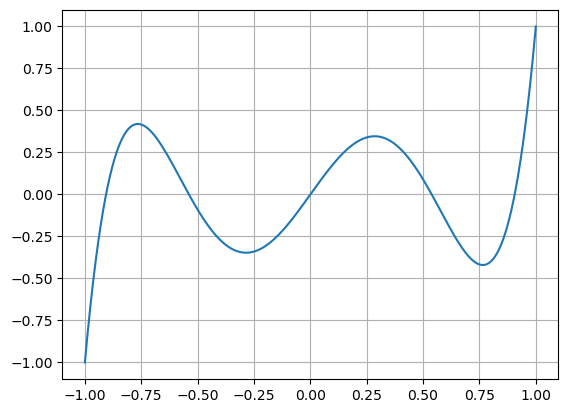

In [24]:
def f(x): return 7.875 * x**5 - 8.75 * x**3 + 1.875 * x

x = np.linspace(-1, 1, 1000)
plt.plot(x, f(x))
plt.grid()

In [36]:
x = np.linspace(-1, 1, 50)
funs = f(x)
x_start = x[:-1]
f_start = funs[:-1]
x_end = x[1:]
f_end = funs[1:]
mask = np.sign(f_start * f_end) <= 0

x_start_important = x_start[mask]
x_end_important = x_end[mask]

for x_s, x_e in zip(x_start_important, x_end_important):
    print(x_s, x_e)
    print(opt.root_scalar(f, bracket=(x_s, x_e)))

-0.9183673469387755 -0.8775510204081632
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: -0.9061798459386639
         method: brentq
-0.5510204081632654 -0.5102040816326531
      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: -0.538469310105683
         method: brentq
-0.020408163265306145 0.020408163265306145
      converged: True
           flag: converged
 function_calls: 3
     iterations: 2
           root: 0.0
         method: brentq
0.510204081632653 0.5510204081632653
      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: 0.538469310105683
         method: brentq
0.8775510204081631 0.9183673469387754
      converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.9061798459386639
         method: brentq


## SciPy Interpolate

1. Spočtěte lineární a kubickou interpolaci bodů $(0, 0), (1, 1), (2, 0), (3, 1)$ na intervalu $[0, 3]$ a vše vykreslete.

In [38]:
import scipy.interpolate as spi

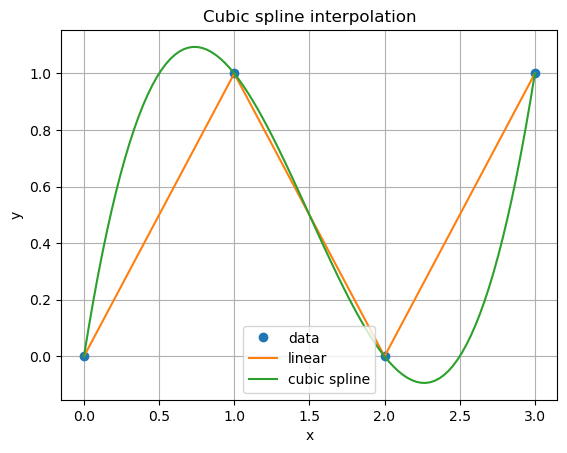

In [40]:
x_data = np.array([0, 1, 2, 3])
y_data = np.array([0, 1, 0, 1])
x = np.linspace(0,3, 100)
f_interp_cubic = spi.interp1d(x_data, y_data, kind='cubic')
f_interp_linear = spi.interp1d(x_data, y_data, kind='linear')

plt.figure()
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x, f_interp_linear(x), label='linear')
plt.plot(x, f_interp_cubic(x), label='cubic spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic spline interpolation')
plt.grid()
plt.show()

2. Pro stejné body spočtěte aproximaci polynomem stupně 2 a vykreslete.

Text(0, 0.5, 'y')

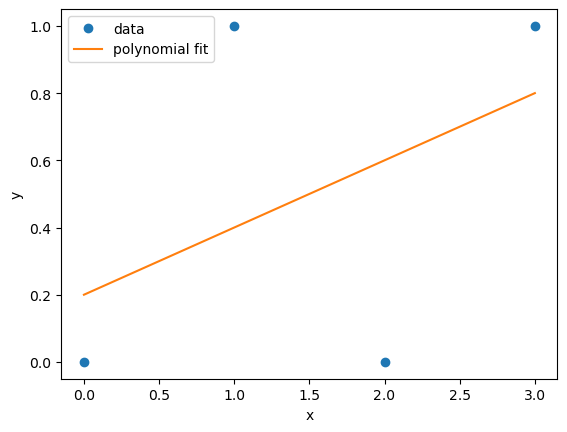

In [43]:
aprox = np.polyfit(x_data, y_data, 2)
plt.plot(x_data, y_data, 'o', label='data')
plt.plot(x, np.polyval(aprox, x), label='polynomial fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')


In [44]:
aprox

array([1.15797575e-16, 2.00000000e-01, 2.00000000e-01])

## SciPy Integrate

In [45]:
import scipy.integrate as spi

1. Spočtěte integrál funkce $f(x) = x^2$ na intervalu $[1, 2]$ pomocí funkce `quad`.

In [46]:
f = lambda x: x**2
spi.quad(f, 1, 2)

(2.3333333333333335, 2.590520390792032e-14)

In [47]:
7/3

2.3333333333333335

2. Spočtěte integrál funkce $f(x) = \exp(-x)$ na intervalu $[0, \infty]$ pomocí funkce `quad`.

In [48]:
f = lambda x: np.exp(-x)

spi.quad(f, 0, np.inf)

(1.0000000000000002, 5.842606701570796e-11)

3. Spočtěte průběh radioaktivního rozpadu:
- rychlost úbytku radioaktivní látky (její hmotnosti) je úměrná aktuální hmotnosti látky $$m'(t) = -\lambda m(t)$$
    - kde $\lambda$ je konstanta pocházející z poločasu rozpadu
- spočtěte hmotnost látky v čase $t \in [0, 100]$ pro $m(0) = 1$ a $\lambda = 0.1$ pomocí funkce `odeint`

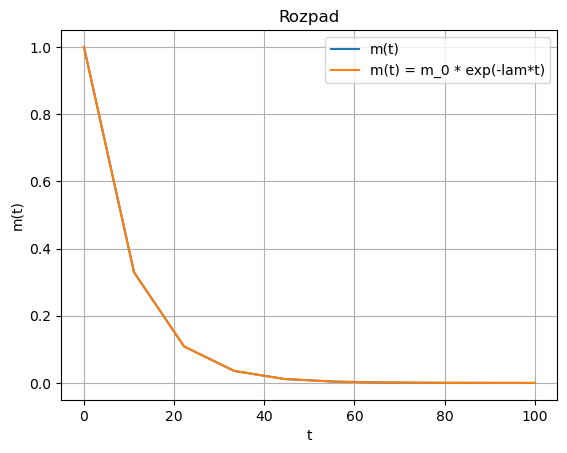

In [54]:
lam = 0.1

def rozpad(x, t):
    xd = -lam * x
    return xd
m_0 = 1

t = np.linspace(0, 100, 10)
res = spi.odeint(rozpad, m_0, t)
plt.plot(t, res, label='m(t)')
plt.plot(t, m_0 * np.exp(-lam*t), label='m(t) = m_0 * exp(-lam*t)')
plt.xlabel('t')
plt.ylabel('m(t)')
plt.title('Rozpad')
plt.legend()
plt.grid()
plt.show()

In [50]:
spi.odeint(rozpad, m_0, t)

array([[1.00000000e+00],
       [9.90039902e-01],
       [9.80179031e-01],
       [9.70416414e-01],
       [9.60750994e-01],
       [9.51181842e-01],
       [9.41708000e-01],
       [9.32328517e-01],
       [9.23042455e-01],
       [9.13848882e-01],
       [9.04746877e-01],
       [8.95735528e-01],
       [8.86813932e-01],
       [8.77981194e-01],
       [8.69236431e-01],
       [8.60578770e-01],
       [8.52007339e-01],
       [8.43521280e-01],
       [8.35119744e-01],
       [8.26801887e-01],
       [8.18566876e-01],
       [8.10413888e-01],
       [8.02342103e-01],
       [7.94350714e-01],
       [7.86438920e-01],
       [7.78605926e-01],
       [7.70850948e-01],
       [7.63173208e-01],
       [7.55571938e-01],
       [7.48046376e-01],
       [7.40595769e-01],
       [7.33219371e-01],
       [7.25916445e-01],
       [7.18686259e-01],
       [7.11528089e-01],
       [7.04441217e-01],
       [6.97424933e-01],
       [6.90478534e-01],
       [6.83601323e-01],
       [6.76792611e-01],
